In [53]:
#SCRIPT PARA ANÁLISE BÁSICA DOS DADOS DE CANDIDATOS(AS) A VEREADOR(A) NO TERRITÓRIO NACIONAL
#DATASET OBTIDO DO REPOSITÓRIO DE DADOS ABERTOS DO TRIBUNAL SUPERIOR ELEITORAL
#DATASET HOSPEDADO NO GITHUB PARA FACILITAR IMPORTAÇÃO

#COMO USAR no Google Colaboratory:
#Clique em "Ambiente de Execução" na Barra de Menus e em "Executar tudo" dentre as opções que são mostradas.
#Informe sua cidade com caracteres acentuados caso houver. Informe também a sigla do estado.

In [54]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
ufs_norte = ['AC','AM','AP','PA','RO','RR','TO']
ufs_nordeste = ['AL','BA','CE','MA','PB','PE','PI','RN','SE']
ufs_centro_oeste = ['GO','MS','MT'] #sem DF porque não elege vereadores
ufs_sudeste = ['ES','MG','RJ','SP']
ufs_sul = ['PR','RS','SC']
prefixo = 'https://raw.githubusercontent.com/elmoneto/analise-dados-tse/master/vereadores-2020/dataset/consulta_cand_2020_'

In [56]:
cidade = input('Informe o nome da cidade: ').upper()
estado = input('Informe a sigla do estado: ').upper()

Informe o nome da cidade: São Gabriel
Informe a sigla do estado: RS


In [57]:
arquivo = prefixo + estado + '.csv'
dados = pd.read_csv(arquivo, sep=';', encoding="latin_1")

In [58]:
dados = dados.query("NM_UE == '{}' & SG_UF == '{}' & DS_CARGO == 'VEREADOR'".format(cidade,estado))

In [59]:
rotulos_instrucao = dados["DS_GRAU_INSTRUCAO"].unique().tolist()
df_instrucao_masculino = dados.query("DS_GENERO == 'MASCULINO'")
df_instrucao_feminino = dados.query("DS_GENERO == 'FEMININO'")
s_instrucao_masculino = df_instrucao_masculino["DS_GRAU_INSTRUCAO"].value_counts().sort_index()
s_instrucao_feminino = df_instrucao_feminino["DS_GRAU_INSTRUCAO"].value_counts().sort_index()

for item in rotulos_instrucao:
    if item not in s_instrucao_feminino.index.values.tolist():
        s = pd.Series([0], index=[item])
        s_instrucao_feminino = s_instrucao_feminino.append(s)
        
for item in rotulos_instrucao:
    if item not in s_instrucao_masculino.index.values.tolist():
        s = pd.Series([0], index=[item])
        s_instrucao_masculino = s_instrucao_masculino.append(s)        

index_instrucao= ['SUPERIOR COMPLETO','SUPERIOR INCOMPLETO','ENSINO MÉDIO COMPLETO','ENSINO MÉDIO INCOMPLETO',
             'ENSINO FUNDAMENTAL COMPLETO','ENSINO FUNDAMENTAL INCOMPLETO','LÊ E ESCREVE']
s_instrucao_masculino = s_instrucao_masculino.reindex(index_instrucao)
s_instrucao_feminino = s_instrucao_feminino.reindex(index_instrucao)

l_instrucao_masculino = []
l_instrucao_feminino = []
for item in s_instrucao_masculino:
    percent = round(item*100 / s_instrucao_masculino.sum(),1)
    l_instrucao_masculino.append(percent)
for item in s_instrucao_feminino:
    percent = round(100*item / s_instrucao_feminino.sum(),1)
    l_instrucao_feminino.append(percent)


# Total de Candidatos


In [60]:
print("Total de Candidatos: {}".format(dados["NM_CANDIDATO"].count()))

Total de Candidatos: 179


# Grau de Instrução

GRAU DE INSTRUÇÃO DE CANDIDATOS:
-------------------------------
SUPERIOR COMPLETO                38
SUPERIOR INCOMPLETO               3
ENSINO MÉDIO COMPLETO            28
ENSINO MÉDIO INCOMPLETO           5
ENSINO FUNDAMENTAL COMPLETO      14
ENSINO FUNDAMENTAL INCOMPLETO    21
LÊ E ESCREVE                      6
Name: DS_GRAU_INSTRUCAO, dtype: int64


GRAU DE INSTRUÇÃO DE CANDIDATAS:
-------------------------------
SUPERIOR COMPLETO                18
SUPERIOR INCOMPLETO               4
ENSINO MÉDIO COMPLETO            20
ENSINO MÉDIO INCOMPLETO           0
ENSINO FUNDAMENTAL COMPLETO       9
ENSINO FUNDAMENTAL INCOMPLETO    10
LÊ E ESCREVE                      3
dtype: int64




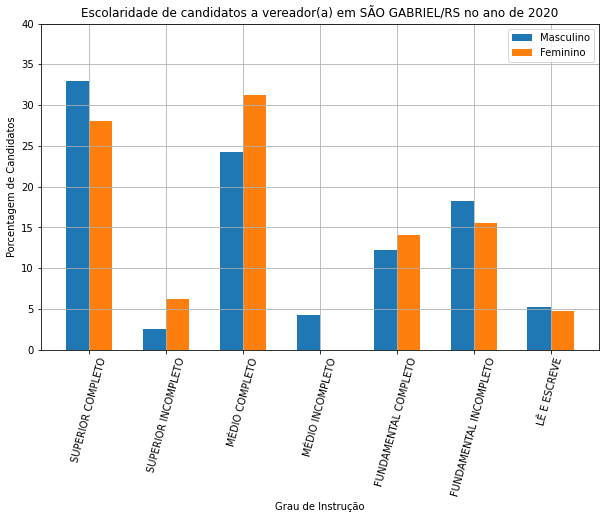

In [61]:
print("GRAU DE INSTRUÇÃO DE CANDIDATOS:")
print("-------------------------------")
print(s_instrucao_masculino)
print("\n")


print("GRAU DE INSTRUÇÃO DE CANDIDATAS:")
print("-------------------------------")
print(s_instrucao_feminino)
print("\n")
rotulos = []
for index in index_instrucao:
    rotulos.append(index.replace("ENSINO ",""))
x = np.arange(len(index_instrucao))
y = np.arange(0,max([max(l_instrucao_masculino),max(l_instrucao_feminino)])+10,5)
largura = 0.30 
fig, ax = plt.subplots()
rects1 = ax.bar(x - largura/2, l_instrucao_masculino, largura, label='Masculino')
rects2 = ax.bar(x + largura/2, l_instrucao_feminino, largura, label='Feminino')
ax.set_ylabel('Porcentagem de Candidatos')
ax.set_xlabel('Grau de Instrução')
ax.set_title('Escolaridade de candidatos a vereador(a) em {}/{} no ano de 2020'.format(cidade,estado))
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(rotulos)
plt.xticks(rotation=75)
ax.legend()
plt.grid()
fig.set_figheight(6)
fig.set_figwidth(10)


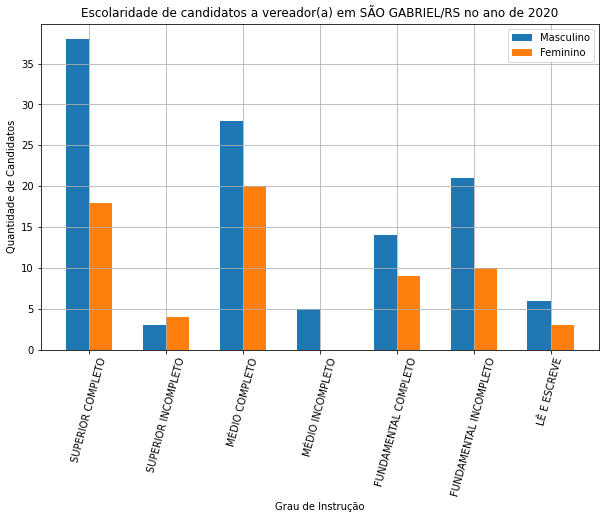

In [62]:
x = np.arange(len(index_instrucao))
max_listas = max([max(s_instrucao_masculino),max(s_instrucao_feminino)])
y = np.arange(0,max_listas+1,round(max_listas/8))
largura = 0.30 
fig, ax = plt.subplots()
rects1 = ax.bar(x - largura/2, s_instrucao_masculino, largura, label='Masculino')
rects2 = ax.bar(x + largura/2, s_instrucao_feminino, largura, label='Feminino')
ax.set_ylabel('Quantidade de Candidatos')
ax.set_xlabel('Grau de Instrução')
ax.set_title('Escolaridade de candidatos a vereador(a) em {}/{} no ano de 2020'.format(cidade,estado))
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(rotulos)
plt.xticks(rotation=75)
ax.legend()
plt.grid()
fig.set_figheight(6)
fig.set_figwidth(10)

# Identificação de Gênero

In [70]:
s_genero = dados["DS_GENERO"].value_counts()
print("Identificação de gênero dos(as) candidatos(as)")
print(s_genero)

Identificação de gênero dos(as) candidatos(as)
MASCULINO    115
FEMININO      64
Name: DS_GENERO, dtype: int64


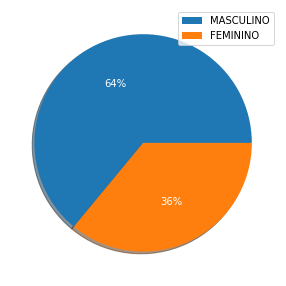

In [73]:
l_genero_percent = []
l_genero_percent.append(round(s_genero["MASCULINO"]*100 / s_genero.sum(),0))
l_genero_percent.append(round(s_genero["FEMININO"]*100 / s_genero.sum(),0))
plt.figure(figsize=(5,5))
plt.pie(x=l_genero_percent,labels=["MASCULINO","FEMININO"],autopct='%1.f%%',shadow=True, textprops={'color':"w"})
plt.legend()

# Identificação Racial

In [74]:
rotulos_raca = dados["DS_COR_RACA"].unique()
print("Identificação Racial dos(as) Candidatos(as)")
s_raca = dados["DS_COR_RACA"].value_counts()
print(s_raca)

Identificação Racial dos(as) Candidatos(as)
BRANCA    162
PRETA      12
PARDA       5
Name: DS_COR_RACA, dtype: int64


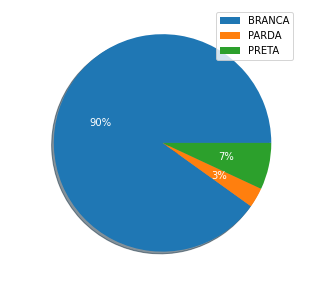

In [75]:
l_raca_percent = []
for item in rotulos_raca:
    l_raca_percent.append(round( s_raca[item]*100 / s_raca.sum(),0))
plt.figure(figsize=(5,5))
plt.pie(x=l_raca_percent,labels=rotulos_raca,autopct='%1.f%%',shadow=True, textprops={'color':"w"})
plt.legend()

# Ocupação e Trabalho

In [65]:
print("20 profissões mais comuns entre os(as) candidatos(as)\n")
dados["DS_OCUPACAO"].value_counts().head(20)

20 profissões mais comuns entre os(as) candidatos(as)



OUTROS                                                                    23
DONA DE CASA                                                              18
EMPRESÁRIO                                                                15
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                                      12
ADVOGADO                                                                   9
SERVIDOR PÚBLICO MUNICIPAL                                                 8
AGRICULTOR                                                                 6
PROFESSOR DE ENSINO FUNDAMENTAL                                            5
TAXISTA                                                                    5
TÉCNICO CONTABILIDADE, ESTATÍSTICA, ECONOMIA DOMÉSTICA E ADMINISTRAÇÃO     4
VEREADOR                                                                   4
MILITAR REFORMADO                                                          4
PROFESSOR E INSTRUTOR DE FORMAÇÃO PROFISSIONAL                             4

## Lista de todos os candidatos, suas ocupações e seus partidos

In [77]:
pd.set_option('display.max_rows', None)
dados[["NM_CANDIDATO","DS_OCUPACAO","NM_PARTIDO"]].sort_values("NM_CANDIDATO")

,NM_CANDIDATO,DS_OCUPACAO,NM_PARTIDO
22370,ADLER ADELINO RAMOS DA SILVA,ADVOGADO,PARTIDO DEMOCRÁTICO TRABALHISTA
198,ADÃO VALDECIR MARTINS SANTANA,VEREADOR,PARTIDO TRABALHISTA BRASILEIRO
20486,AGILDO CESAR ANTUNES BORGES,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,PODEMOS
21084,AIRTOM DA SILVA GOULART,TRABALHADOR RURAL,PODEMOS
4098,ALEXANDRE SILVEIRA MARTINS NETO,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,DEMOCRATAS
7804,ALIANDRO MOREIRA DE MOREIRA,TAXISTA,PODEMOS
11983,ALJACI LEOJANI DOMINGUES BRITTO,EMPRESÁRIO,REPUBLICANOS
4055,AMERICO FAGUNDES DOS SANTOS,AGRICULTOR,PARTIDO DOS TRABALHADORES
25800,ANA HELENA MACEDO BRASIL,OUTROS,PARTIDO TRABALHISTA BRASILEIRO
16855,ANA LUCIA CAMPELLO SANTOS,DONA DE CASA,PODEMOS
